In [108]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import GPy
from tqdm import tqdm

## 1D simple

Optimization restart 1/10, f = 0.7084154779860856
Optimization restart 2/10, f = 0.7084122257601404
Optimization restart 3/10, f = 0.7084122255115721
Optimization restart 4/10, f = 0.7084122254005605
Optimization restart 5/10, f = 0.7084124582000624
Optimization restart 6/10, f = 0.7084122253770024
Optimization restart 7/10, f = 0.7084122255960259
Optimization restart 8/10, f = 0.7084122312608354
Optimization restart 9/10, f = 0.708412226778286
Optimization restart 10/10, f = 0.7084122255676335


GP_regression.,value,constraints,priors
rbf.variance,34.32796930531318,+ve,
rbf.lengthscale,9.02042379471711,+ve,
Gaussian_noise.variance,0.01,"0.01,10000.0",


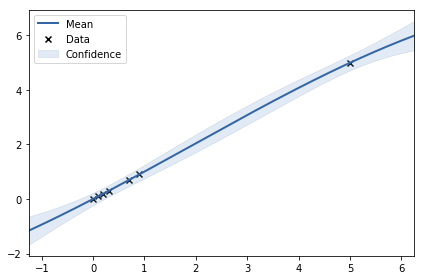

In [110]:
X = np.array([0.0, 0.1, 0.2, 0.3, 0.7, 0.9, 5.0]).reshape(-1, 1)

Y = np.array([0.0, 0.1, 0.2, 0.3, 0.7, 0.9, 5]).reshape(-1, 1)
Y += np.random.randn(*Y.shape) * 1e-6


# m = GPy.models.GPRegression(X, Y, normalizer=True)
# m.optimize_restarts(num_restarts=100)
# print(m.param_array)

m = GPy.models.GPRegression(X, Y)
m.Gaussian_noise.variance.unconstrain()
m.Gaussian_noise.variance.constrain_bounded(1e-2, 10000.)
m.optimize_restarts()
m.plot()
m
# m.optimize_restarts()
# print(m.param_array)

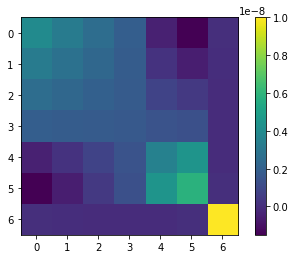

In [62]:
mu, cov = m.predict(X, full_cov=True)

plt.imshow(cov)
plt.colorbar()

## Realna fuj data

In [13]:
skip = 3

X = np.load("data_X.npy")[skip:]
Y = np.load("data_Y.npy").reshape(-1, 1)[skip:]

def subset(i):
    idx = list(set(range(len(X) - skip)) - set(i))
    return X[idx], Y[idx]

In [97]:
def likelihood_plot(grid=20, logmax=20, noise=0.):
    ll = np.zeros([grid, grid], dtype=np.float32)

    ls_grid = np.logspace(1, logmax/3, num=grid)
    variance_grid = np.logspace(1, logmax, num=grid)

    for i, ls in tqdm(enumerate(ls_grid)):
        for j, variance in enumerate(variance_grid):
            m = GPy.models.GPRegression(X, Y, kernel=GPy.kern.RBF(input_dim=1, lengthscale=ls, variance=variance))
#             m.kern.variance.set_prior(GPy.priors.Gamma(1., 0.1))
#             m.kern.lengthscale.set_prior(GPy.priors.Gamma(1., 0.1))

            m.Gaussian_noise.variance = noise
            ll[i, j] = m.log_likelihood()
            
    plt.figure(figsize=(12, 12))
    plt.pcolor(ls_grid, variance_grid, ll)
    plt.colorbar()

40it [00:08,  4.83it/s]


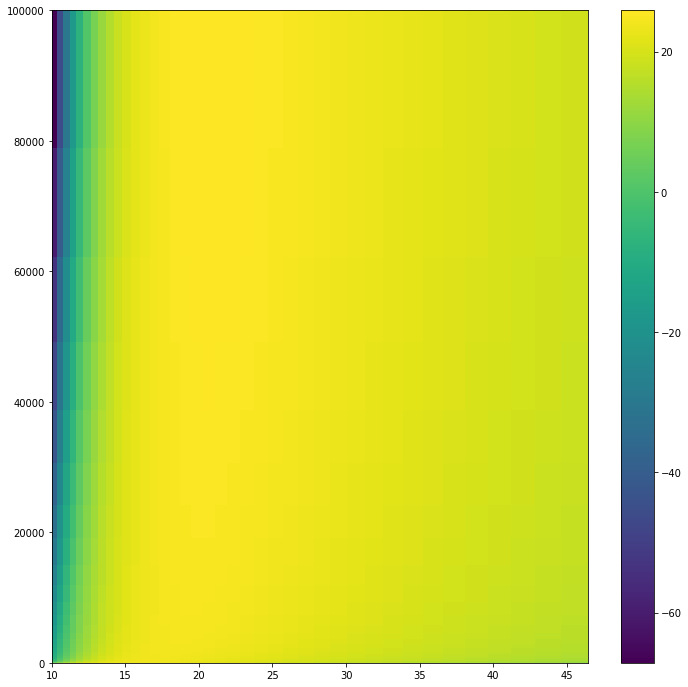

In [94]:
likelihood_plot(grid=40, logmax=5, noise=0.)

In [105]:
X = np.array([
    [0.9098032 , 0.10719252],
    [0.07689123, 0.        ],
    [0.92378354, 0.29961774],
    [0.93852574, 0.42585665],
    [1.        , 1.        ],
    [0.03271898, 0.7458292 ],
    [0.4280041 , 0.9168633 ],
    [0.42700773, 0.57499546],
    [0.4229433 , 0.9811548 ],
    [0.90882766, 0.49437103]
], dtype=np.float64)

Y = np.array([
    [1.12418827],
    [0.07689123],
    [1.52301903],
    [1.79023902],
    [3.        ],
    [1.52437748],
    [2.26173076],
    [1.57699869],
    [2.38525289],
    [1.89756974]
], dtype=np.float64)

m = GPy.models.GPRegression(X, Y, normalizer=True)
m.optimize_restarts(num_restarts=10)
print(m.param_array)

m = GPy.models.GPRegression(X, Y)
m.optimize_restarts()
print(m.param_array)

Optimization restart 1/10, f = -40.97102782712922
Optimization restart 2/10, f = -37.78443894368147
Optimization restart 3/10, f = -38.29883770433733
Optimization restart 4/10, f = -36.42196036874125
Optimization restart 5/10, f = -40.298814830192896
Optimization restart 6/10, f = -37.60802703262368
Optimization restart 7/10, f = -34.13416111402071
Optimization restart 8/10, f = -40.83226491675627
Optimization restart 9/10, f = -39.37057162071609
Optimization restart 10/10, f = -42.49927104984683
[1.84550818e+007 2.93498808e+003 5.56268465e-309]
Optimization restart 1/10, f = -38.79401656853218
Optimization restart 2/10, f = -41.786943755789984
Optimization restart 3/10, f = -42.54842638883408
Optimization restart 4/10, f = -41.9932568046089
Optimization restart 5/10, f = -39.36891176544127
Optimization restart 6/10, f = -42.41631290655247
Optimization restart 7/10, f = -42.58903908425335
Optimization restart 8/10, f = -36.77140047292542
Optimization restart 9/10, f = -42.4640488657203

 /home/darth/projects/bopt/.venv/lib/python3.6/site-packages/GPy/likelihoods/gaussian.py:119: RuntimeWarning:invalid value encountered in sqrt
 /home/darth/projects/bopt/.venv/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


{'dataplot': [<matplotlib.collections.PathCollection at 0x7fdab91cc240>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x7fdab91cce48>]}

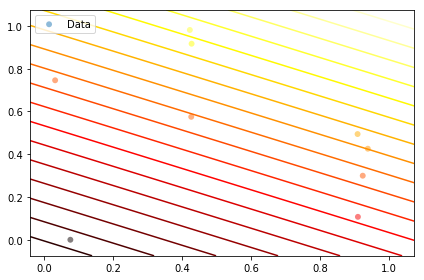

In [106]:
m.plot()

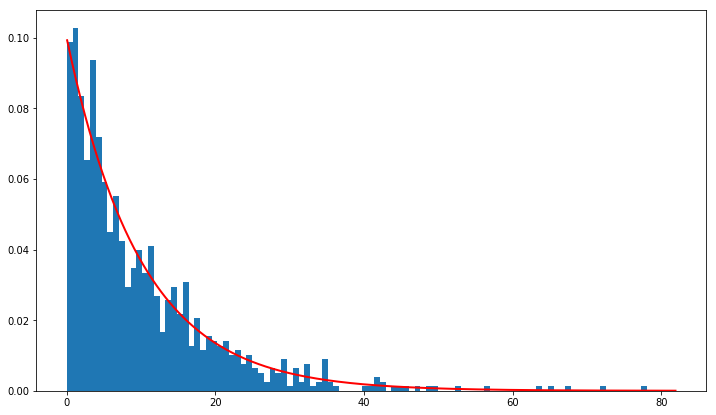

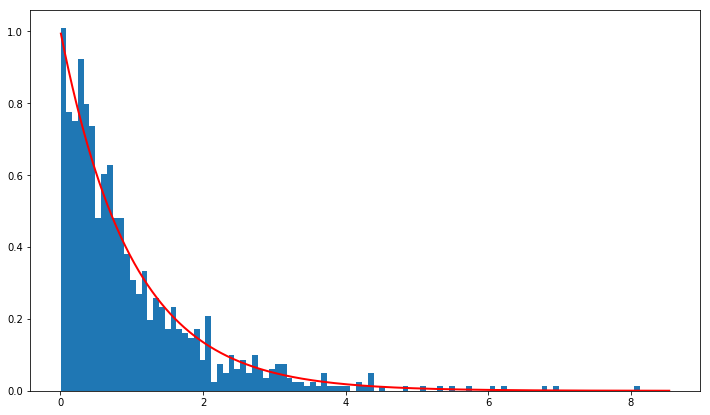

In [34]:
plt.figure(figsize=(12,7))
GPy.priors.Gamma(1, 0.1).plot()

plt.figure(figsize=(12,7))
GPy.priors.Gamma(1, 1.).plot()

In [36]:
arrs = []

for _ in range(10):
    m = GPy.models.GPRegression(X, Y)
    m.optimize_restarts(num_restarts=2)
    arrs.append(m.param_array)
    
print(np.array(arrs))

Optimization restart 1/2, f = -38.79401656853218
Optimization restart 2/2, f = -39.74732866317815
Optimization restart 1/2, f = -38.79401656853218
Optimization restart 2/2, f = -41.0510481752108
Optimization restart 1/2, f = -38.79401656853218
Optimization restart 2/2, f = -40.63056991109339
Optimization restart 1/2, f = -38.79401656853218
Optimization restart 2/2, f = -42.440033521883116
Optimization restart 1/2, f = -38.79401656853218
Optimization restart 2/2, f = -39.54784464041957
Optimization restart 1/2, f = -38.79401656853218
Optimization restart 2/2, f = -36.12250269481127
Optimization restart 1/2, f = -38.79401656853218
Optimization restart 2/2, f = -42.0407786809926
Optimization restart 1/2, f = -38.79401656853218
Optimization restart 2/2, f = -41.49885951767116
Optimization restart 1/2, f = -38.79401656853218
Optimization restart 2/2, f = -38.590910160803006
Optimization restart 1/2, f = -38.79401656853218
Optimization restart 2/2, f = -42.53620284874669
[[8.01397820e+004 3.

In [83]:
X = np.array([
    [0.032, 0.745],
    [0.40, 0.916],
    [0.44, 0.574],
    [0.938, 0.425],
    [0.999999, 0.999],
], dtype=np.float32)

Y = np.array([
    [1.5244],
    [2.2617],
    [1.577],
    [1.79],
    [3.0],
], dtype=np.float32)

m = GPy.models.GPRegression(X, Y, normalizer=True)
m.kern.variance.set_prior(GPy.priors.Gamma(1, 0.1))
m.kern.lengthscale.set_prior(GPy.priors.Gamma(1, 0.1))
m.Gaussian_noise.set_prior(GPy.priors.Gamma(1, 0.1))
m.optimize()
m

reconstraining parameters GP_regression.Gaussian_noise


GP_regression.,value,constraints,priors
rbf.variance,2.028902458566405e-07,+ve,
rbf.lengthscale,1.7722148133515973e-07,+ve,
Gaussian_noise.variance,1.1909957216958915,+ve,"Ga(1, 0.1)"


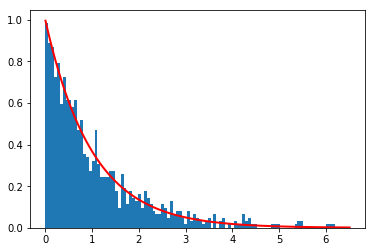

In [97]:
GPy.priors.Gamma(1, 1).plot()

 /home/darth/projects/bopt/.venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
 /home/darth/projects/bopt/.venv/lib/python3.6/site-packages/GPy/core/parameterization/priors.py:319: RuntimeWarning:invalid value encountered in log


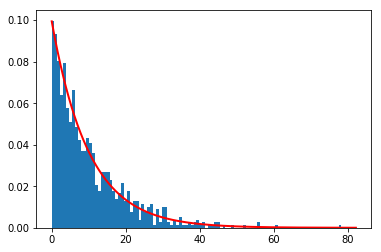

In [24]:
GPy.priors.Gamma(1, 0.1).plot()

In [25]:
X = np.array([
    [0.032, 0.745],
    [0.428, 0.916],
    [0.427, 0.574],
    [0.938, 0.425],
    [0.999999, 0.999],
], dtype=np.float32)

Y = np.array([
    [1.5244],
    [2.2617],
    [1.577],
    [1.79],
    [3.0],
], dtype=np.float32)

m = GPy.models.GPRegression(X, Y, normalizer=True)
m.Gaussian_noise.variance.unconstrain()
m.Gaussian_noise.variance.constrain_bounded(1e-1, 1000.)
m.optimize()
print(m)

m = GPy.models.GPRegression(X, Y)
m.optimize()
print(m)


Name : GP regression
Objective : 6.680725937901721
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                value  |  constraints  |  priors
  rbf.variance             |   2.8647091791871895  |      +ve      |        
  rbf.lengthscale          |   0.8020173509221299  |      +ve      |        
  Gaussian_noise.variance  |  0.10000000720573136  |  0.1,1000.0   |        

Name : GP regression
Objective : -2.466471570551306
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |      186056.92798024838  |      +ve      |        
  rbf.lengthscale          |      386.02365684916754  |      +ve      |        
  Gaussian_noise.variance  |  5.562684646268137e-309  |      +ve      |        


In [49]:
m = GPy.models.GPRegression(X, Y, normalizer=True)
m.optimize()
print(m.param_array)

[6.34150113e+005 3.92048931e+002 5.56268465e-309]
[1.86056928e+005 3.86023657e+002 5.56268465e-309]


Optimization restart 1/10, f = 6.663374368455425
Optimization restart 2/10, f = -1.7768595939467406
Optimization restart 3/10, f = -1.7768514479315183


 /home/darth/projects/bopt/.venv/lib/python3.6/site-packages/GPy/kern/src/rbf.py:51: RuntimeWarning:overflow encountered in square


Optimization restart 4/10, f = -1.7768542480289398
Optimization restart 5/10, f = -1.7768552202997991
Optimization restart 6/10, f = -1.7768575280986028
Optimization restart 7/10, f = -1.776857264097849
Optimization restart 8/10, f = -1.7768544566890565
Optimization restart 9/10, f = -1.7768540261343873
Optimization restart 10/10, f = -1.7768572265447737


GP_regression.,value,constraints,priors
rbf.variance,45682.49783368958,+ve,
rbf.lengthscale,191.04849281660785,+ve,
Gaussian_noise.variance,5.562684646268137e-309,+ve,


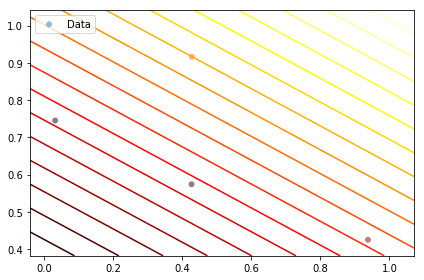

In [20]:
m.Gaussian_noise.variance.fix(1.)
m.Gaussian_noise.variance.unfix()
m.optimize_restarts(robust=True)
m.plot()
m

In [279]:
m.Gaus

GP_regression.,value,constraints,priors
Mat52.variance,150894.75167066968,+ve,
Mat52.lengthscale,448.46629921669637,+ve,
Gaussian_noise.variance,5.562684646268137e-309,+ve,


In [2]:
m.plot(fixed_inputs=[(0, 0.032)], samples=10)

NameError: name 'm' is not defined

In [263]:

m[:] = [1., 1., 1.]

{'dataplot': [<matplotlib.collections.PathCollection at 0x7f663e41d9e8>]}

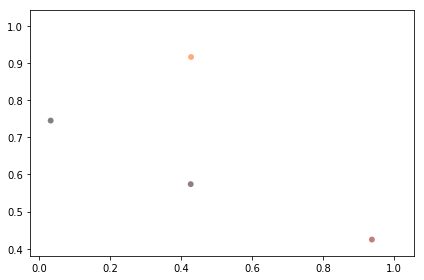

In [266]:
m.plot_data()

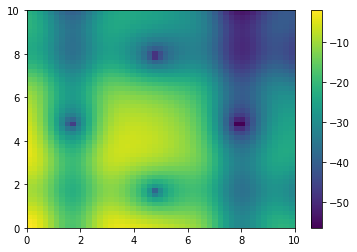

In [200]:
import math

X = 10*np.random.random([30, 3])

def f(xx):
    x = xx[0]
    y = xx[1]
    z = xx[2]
    
    # lambda x: math.sin(x[0]) * math.cos(x[1]) + math.cos(x[2])
    # return (z*x*y - x)**2 + (x*y ** 2)**2 + (x*y**3)**2
    return x + y - y**1.5 - x**1.5 - (1 + math.sin(x))**3 - (1 + math.sin(y))**4 \
             + 4*math.log(1 + math.sin(x) * math.sin(y)) \
             + 4*math.log(1 + math.sin(z) * math.sin(y)) \
             + z**1.7


Y = np.array(list(map(f, X)))
Y += 1e-6*np.random.random(Y.shape)
Y = Y.reshape(-1, 1)

x1 = np.linspace(0, 10)
x2 = np.linspace(0, 10)

Z = []

for x in x1:
    zz = []
    for y in x2:
        zz.append(f([x, y, 0]))
        
    Z.append(zz)
    
plt.pcolor(x1, x2, Z)
plt.colorbar()


Name : GP regression
Objective : 113.60879929146567
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  309.93108194866437  |      +ve      |        
  rbf.lengthscale          |  2.7178973307324177  |      +ve      |        
  Gaussian_noise.variance  |              0.0001  |   +ve fixed   |        


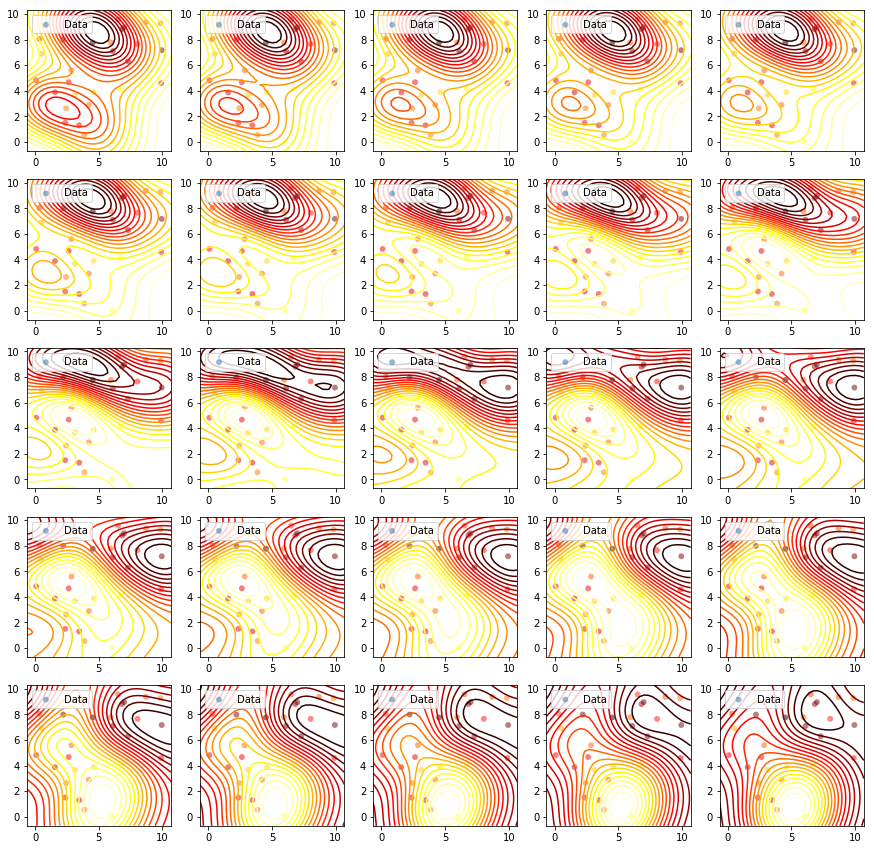

In [201]:
m = GPy.models.GPRegression(X, Y)
m.Gaussian_noise.variance.fix(1e-4)
m.optimize()
print(m)

plt.figure(figsize=(15, 15))

for i, z in enumerate(np.linspace(0, 10, num=25)):
    ax = plt.subplot(5,5, i+1)
    m.plot(fixed_inputs=[(2, z)], ax=ax)
# m.plot(fixed_inputs=[(2, 2.3)])
# m.plot(fixed_inputs=[(2, 0.6)])
# m.plot(fixed_inputs=[(2, 0.9)])
# m.plot(fixed_inputs=[(0, 1.2)])

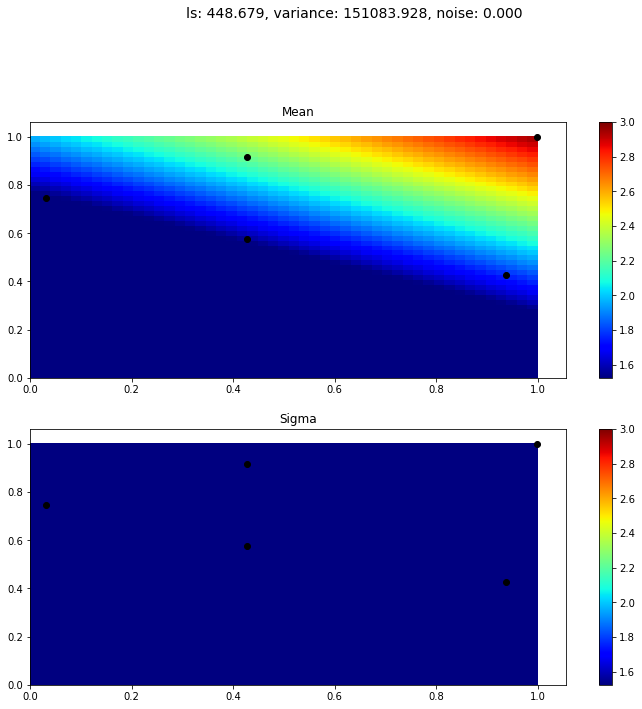

In [258]:
b1 = (0., 1.)
b2 = (0., 1.)

# TODO: float64
x1 = np.linspace(0., 1., 50, dtype=np.float64)
x2 = np.linspace(0., 1., 50, dtype=np.float64)

assert len(x1) < 80, f"too large x1, len = {len(x1)}"
assert len(x2) < 80, f"too large x1, len = {len(x2)}"

gx, gy = np.meshgrid(x1, x2)

X_2d = np.c_[gx.ravel(), gy.ravel()]

bounds = [b1, b2]

mu, std = m.predict(X_2d)

# TODO: use paramz properly
param_str = "ls: {:.3f}, variance: {:.3f}, noise: {:.3f}".format(
        float(m.kern.lengthscale),
        float(m.kern.variance),
        float(m.Gaussian_noise.variance)

)

std = np.sqrt(std)

# TODO: fuj
mu_mat  = mu.reshape(gx.shape[0], gx.shape[1])
std_mat = std.reshape(gx.shape[0], gx.shape[1])
extent  = [*b1, *b2]

# TODO: take as input
vmin = Y.min()
vmax = Y.max()

import matplotlib.pyplot as plt
import datetime
# assert result.best_x is not None

# plt.title(f"LBFGS={U_LB} TF={U_TF}   noise={round(gp.noise, 2)} {result.kernel}", fontsize=20)
# plt.pcolor(mu_mat, extent=extent, aspect="auto")
plt.figure(figsize=(12, 16))

plt.suptitle(param_str, fontsize=14)

plt.subplot(3, 1, 1)
plt.title("Mean")
plt.pcolor(gx, gy, mu_mat, cmap="jet", vmin=vmin, vmax=vmax)
plt.colorbar()
plt.scatter(X[:, 0], X[:, 1], c="k")

plt.subplot(3, 1, 2)
plt.title("Sigma")
plt.pcolor(gx, gy, std_mat, cmap="jet", vmin=vmin, vmax=vmax)
plt.colorbar()
plt.scatter(X[:, 0], X[:, 1], c="k")


 /home/darth/projects/bopt/.venv/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


{'dataplot': [<matplotlib.collections.PathCollection at 0x7f663e9b65f8>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x7f663e9b6588>]}

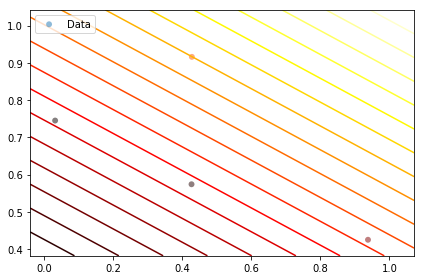

In [255]:
m.plot()

In [76]:
subset(0)

(array([[0.07689123, 0.        ],
        [0.92378354, 0.29961774],
        [0.93852574, 0.42585665],
        [1.        , 1.        ],
        [0.03271898, 0.7458292 ],
        [0.4280041 , 0.9168633 ],
        [0.42700773, 0.57499546],
        [0.4229433 , 0.9811548 ],
        [0.90882766, 0.49437103]], dtype=float32), array([[0.07689123],
        [1.52301903],
        [1.79023902],
        [3.        ],
        [1.52437748],
        [2.26173076],
        [1.57699869],
        [2.38525289],
        [1.89756974]]))

In [100]:
np.seterr(all="warn")
m = GPy.models.GPRegression(X[5:], Y[5:], GPy.kern.Matern52(input_dim=2.))
m.optimize()
m.param_array

array([6.44336560e+005, 9.50368364e+002, 5.56268465e-309])

{'dataplot': [<matplotlib.collections.PathCollection at 0x7f663f01cd68>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x7f663f01cc88>]}

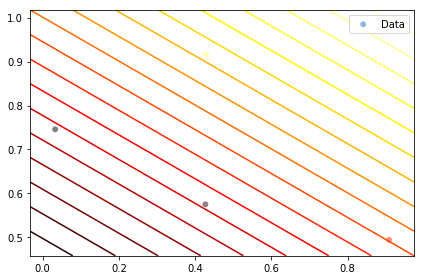

In [105]:
m.plot(cmap="gray")

In [88]:
np.seterr(all="warn")
m = GPy.models.GPRegression(X, Y, GPy.kern.Matern52(input_dim=2.))
m.optimize()
m.param_array

array([2.21225356e+007, 5.83320522e+003, 5.56268465e-309])

In [106]:
m

GP_regression.,value,constraints,priors
Mat52.variance,644336.5604657296,+ve,
Mat52.lengthscale,950.3683642652793,+ve,
Gaussian_noise.variance,5.562684646268137e-309,+ve,


In [107]:
print(X)
print(Y)

[[0.9098032  0.10719252]
 [0.07689123 0.        ]
 [0.92378354 0.29961774]
 [0.93852574 0.42585665]
 [1.         1.        ]
 [0.03271898 0.7458292 ]
 [0.4280041  0.9168633 ]
 [0.42700773 0.57499546]
 [0.4229433  0.9811548 ]
 [0.90882766 0.49437103]]
[[1.12418827]
 [0.07689123]
 [1.52301903]
 [1.79023902]
 [3.        ]
 [1.52437748]
 [2.26173076]
 [1.57699869]
 [2.38525289]
 [1.89756974]]


{'dataplot': [<matplotlib.collections.PathCollection at 0x7f3124db5e48>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f3124db5da0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f3124dc2320>]}

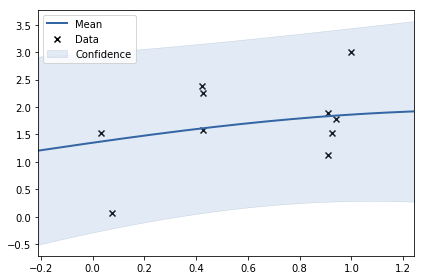

In [6]:
m.plot()

In [26]:
GPy.plotting.gpy_plot.gp_plots.plot(m)

ValueError: shape mismatch: value array of shape (200,1,1) could not be broadcast to indexing result of shape (1,200)

In [9]:
m.plot()

ValueError: shape mismatch: value array of shape (200,1,1) could not be broadcast to indexing result of shape (1,200)

In [289]:
m = GPy.examples.regression.sparse_GP_regression_1D(optimize=False, plot=False)

In [290]:
print(m)


Name : sparse_gp
Objective : 396.5014289026596
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |   value  |  constraints  |  priors
  inducing_inputs          |  (5, 1)  |               |        
  rbf.variance             |     1.0  |      +ve      |        
  rbf.lengthscale          |     1.0  |      +ve      |        
  Gaussian_noise.variance  |     1.0  |      +ve      |        


In [291]:
m

sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


In [292]:
m.rbf

rbf.,value,constraints,priors
variance,1.0,+ve,
lengthscale,1.0,+ve,


In [293]:
m[".*var"]

sparse_gp.rbf.variance:
Param([1.])
sparse_gp.Gaussian_noise.variance:
Param([1.])

In [294]:
m[".*var"] = [2., 3.]
print(m)
m.optimize()
print(m)


Name : sparse_gp
Objective : 608.0315900535575
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |   value  |  constraints  |  priors
  inducing_inputs          |  (5, 1)  |               |        
  rbf.variance             |     2.0  |      +ve      |        
  rbf.lengthscale          |     1.0  |      +ve      |        
  Gaussian_noise.variance  |     3.0  |      +ve      |        

Name : sparse_gp
Objective : -587.051736059293
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |                  value  |  constraints  |  priors
  inducing_inputs          |                 (5, 1)  |               |        
  rbf.variance             |      2.034272539726368  |      +ve      |        
  rbf.lengthscale          |     2.6275839473634033  |      +ve      |        
  Gaussian_noise.variance  |  0.0027283889371021303  |      +ve      |        


In [296]:
print(m[""])

  index  |          sparse_gp.inducing_inputs  |  constraints  |  priors
  [0 0]  |                         1.44353636  |               |        
  [1 0]  |                        -1.51481942  |               |        
  [2 0]  |                        -0.02126237  |               |        
  [3 0]  |                         2.65041510  |               |        
  [4 0]  |                        -2.70327583  |               |        
  -----  |             sparse_gp.rbf.variance  |  -----------  |  ------
  [0]    |                         2.03427254  |      +ve      |        
  -----  |          sparse_gp.rbf.lengthscale  |  -----------  |  ------
  [0]    |                         2.62758395  |      +ve      |        
  -----  |  sparse_gp.Gaussian_noise.variance  |  -----------  |  ------
  [0]    |                         0.00272839  |      +ve      |        


In [297]:
m[:] = np.r_[[-4,-2,0,2,4], [.1,2], [.7]]
m.plot()
m.optimize()
m.plot()

This is the format of your plot grid:
[ (1,1) x1,y1 ]



AttributeError: 'tuple' object has no attribute 'append'

{'inducing': <matplotlib.collections.PathCollection at 0x7ff67d9d7da0>,
 'dataplot': [<matplotlib.collections.PathCollection at 0x7ff67d9e2240>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7ff67d9e20b8>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7ff67d9e2668>]}

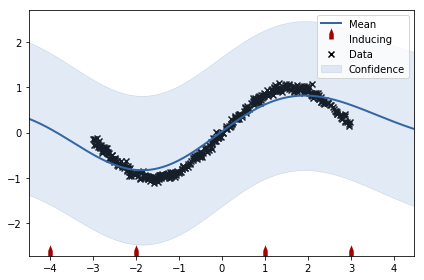

In [29]:
m.inducing_inputs[2:, 0] = [1,3,5]
m.plot()

In [31]:
precision = 1/m.Gaussian_noise.variance
precision

array([1.42857143])

In [35]:
m.Gaussian_noise.variational_expectations

<bound method Gaussian.variational_expectations of <GPy.likelihoods.gaussian.Gaussian object at 0x7ff681e3e860>>

{'covariance': [[<matplotlib.lines.Line2D at 0x7ff67ce673c8>]]}

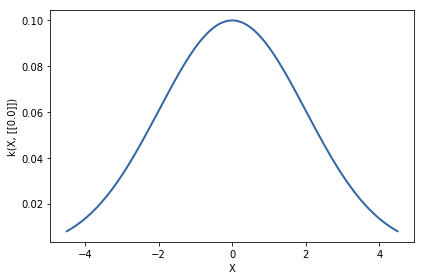

In [40]:
m.rbf.plot()

In [43]:
print(m.rbf.gradient)
print(m.gradient)

[105.78533844 -13.20305446]
[   2.4515349     4.04725341    1.22939933   -0.45715871   -0.35859054
  105.78533844  -13.20305446 -267.95767014]


In [44]:
m.optimize()
m.gradient

array([ 2.62226856e-03,  3.17559710e-05,  1.60616565e-03,  2.70017398e-03,
        9.88452208e-04,  4.35250325e-03, -2.32631964e-04,  8.42774445e-01])

In [178]:
m

sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,1.14743270304706,+ve,
rbf.lengthscale,2.422929594105645,+ve,
Gaussian_noise.variance,0.0024349092904005086,+ve,


In [180]:
m.rbf.variance.unconstrain()
m

sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,1.14743270304706,,
rbf.lengthscale,2.422929594105645,+ve,
Gaussian_noise.variance,0.0024349092904005086,+ve,


In [185]:
m.rbf.variance.constrain_positive()
m.optimize()
m

reconstraining parameters sparse_gp.rbf.variance


sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,1.1474954012264635,+ve,
rbf.lengthscale,2.422947715516868,+ve,
Gaussian_noise.variance,0.0024349009828236986,+ve,


In [67]:
m.inducing_inputs[0].fix()

array([0])

In [68]:
m

sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",{fixed},
rbf.variance,2.0042980289974666,+ve,
rbf.lengthscale,2.6270590982257294,+ve,
Gaussian_noise.variance,0.002621520230613292,+ve,


In [69]:
m.unfix()

array([0])

In [70]:
m

sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,2.0042980289974666,+ve,
rbf.lengthscale,2.6270590982257294,+ve,
Gaussian_noise.variance,0.002621520230613292,+ve,


In [71]:
m.unconstrain()
m

sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,2.0042980289974666,,
rbf.lengthscale,2.6270590982257294,,
Gaussian_noise.variance,0.002621520230613292,,


In [80]:
m.rbf.constrain_bounded(3., 100.)
m.optimize_restarts()
m

reconstraining parameters sparse_gp.rbf


Optimization restart 1/10, f = 1052.0658334887253
Optimization restart 2/10, f = 1052.0658356282795
Optimization restart 3/10, f = 1052.008649571644
Optimization restart 4/10, f = 1052.0658409812527
Optimization restart 5/10, f = 1052.0086548805273
Optimization restart 6/10, f = 1052.0087655561065
Optimization restart 7/10, f = 1052.0086811575316
Optimization restart 8/10, f = 1052.008649940969
Optimization restart 9/10, f = 1052.008643594319
Optimization restart 10/10, f = 1052.065839293495


sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,3.00000043143305,"3.0,100.0",
rbf.lengthscale,4.477501163287212,"3.0,100.0",
Gaussian_noise.variance,30.0,fixed +ve,


In [186]:
m.rbf.unconstrain()
m.rbf.constrain_positive()
m.Gaussian_noise.variance.fix(30)
m.optimize_restarts()
m

Optimization restart 1/10, f = 1050.7956072706497
Optimization restart 2/10, f = 1050.7956067993534
Optimization restart 3/10, f = 1050.7956068843023
Optimization restart 4/10, f = 1050.795609838541
Optimization restart 5/10, f = 1050.7956068589037
Optimization restart 6/10, f = 1050.795606646418
Optimization restart 7/10, f = 1050.795607059321
Optimization restart 8/10, f = 1051.332914269756
Optimization restart 9/10, f = 1050.7956208453252
Optimization restart 10/10, f = 1050.7956080124713


sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,0.2546044063116931,+ve,
rbf.lengthscale,1.39730213119287,+ve,
Gaussian_noise.variance,30.0,+ve fixed,


In [187]:
m.Gaussian_noise.variance.unfix()
m.optimize_restarts()
m

Optimization restart 1/10, f = -609.1440261237003
Optimization restart 2/10, f = -609.1440263675759
Optimization restart 3/10, f = -609.1440269335872
Optimization restart 4/10, f = -609.1440267433063
Optimization restart 5/10, f = -609.1440269127925
Optimization restart 6/10, f = -609.1440269033264
Optimization restart 7/10, f = -609.1440269176965
Optimization restart 8/10, f = -609.1440262967153
Optimization restart 9/10, f = -609.1440267819853
Optimization restart 10/10, f = -609.1440268982406


sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,1.147490903098467,+ve,
rbf.lengthscale,2.4229426717586247,+ve,
Gaussian_noise.variance,0.0024348936605861323,+ve,


{'inducing': <matplotlib.collections.PathCollection at 0x7ff67c7a2da0>,
 'gpmean': [[<matplotlib.lines.Line2D at 0x7ff67c7ac128>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7ff67c7a2cf8>]}

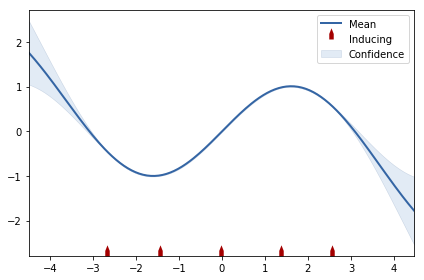

In [86]:
m.plot_f()

# GPR

In [188]:
X = np.random.uniform(-3., 3., (20, 1))
Y = np.sin(X) + np.random.randn(20, 1) * 0.05

In [189]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

In [190]:
m = GPy.models.GPRegression(X, Y, kernel)

In [164]:
m.to_dict()

{'name': 'GP regression',
 'class': 'GPy.models.GPRegression',
 'X': [[2.360844101673311],
  [-0.9049509788044237],
  [1.231869157631265],
  [2.900906896700219],
  [1.2633183711474567],
  [-2.9351820961701964],
  [-0.13642551703711625],
  [-2.9185275431981306],
  [-1.6026523406552107],
  [1.3191752354474637],
  [1.46978829286319],
  [-2.5023786251245737],
  [1.2093907428483082],
  [-0.9132703790103043],
  [-1.3250910622632073],
  [2.8128254409879307],
  [0.06642838065583678],
  [-0.45073501731649834],
  [0.3348667344693528],
  [-0.8613615782836339]],
 'Y': [[0.7265901092744531],
  [-0.8137143178977249],
  [0.972812171298128],
  [0.16114756688092402],
  [0.9831160379004612],
  [-0.3024814258975048],
  [-0.16244087043224734],
  [-0.13770918025457038],
  [-1.0618823483269844],
  [0.9083655327707265],
  [1.0363249938415338],
  [-0.6330446758907459],
  [0.9062516854440635],
  [-0.6945704201948285],
  [-0.9817957602010315],
  [0.3417432362848068],
  [0.036639587898224094],
  [-0.396960480353

{'dataplot': [<matplotlib.collections.PathCollection at 0x7ff6717f4da0>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7ff6717f4d30>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7ff671780278>]}

/home/darth/projects/bopt/.venv/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



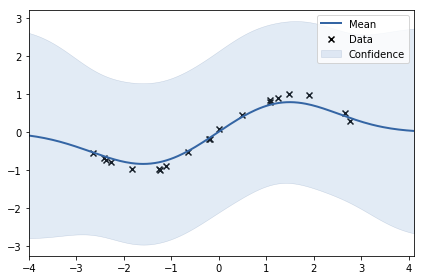

In [191]:
m.plot()

{'dataplot': [<matplotlib.collections.PathCollection at 0x7ff671723be0>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7ff671723b70>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7ff67172d0f0>]}

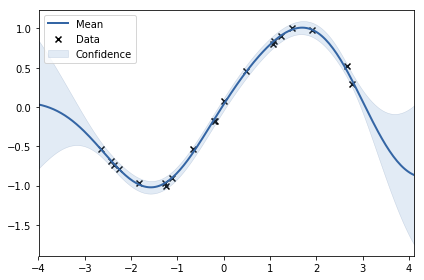

In [192]:
m.optimize(messages=True)
m.plot()

Optimization restart 1/10, f = -19.22709288184518
Optimization restart 2/10, f = -19.227092880013696
Optimization restart 3/10, f = -19.227092881182475
Optimization restart 4/10, f = -19.227092881618468
Optimization restart 5/10, f = -19.227092881842527
Optimization restart 6/10, f = -19.227092881096276
Optimization restart 7/10, f = -19.227092881844644
Optimization restart 8/10, f = -19.227092881830664
Optimization restart 9/10, f = -19.227092881844314
Optimization restart 10/10, f = -19.22709288184109


{'dataplot': [<matplotlib.collections.PathCollection at 0x7ff67b1a5550>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7ff67b1a54e0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7ff67b1a5a20>]}

 /home/darth/projects/bopt/.venv/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


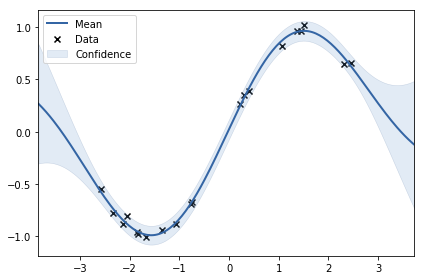

In [101]:
m.optimize_restarts(num_restarts=10)
m.plot()

In [121]:
GPy.plotting.change_plotting_library("matplotlib")

{'dataplot': [<matplotlib.collections.PathCollection at 0x7ff66aa60940>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x7ff66aac50f0>]}

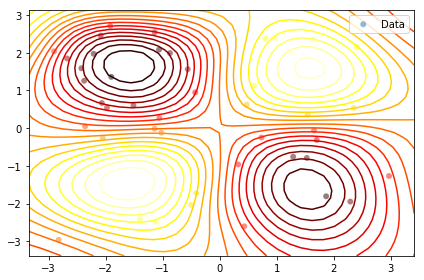

In [124]:
m.plot()

In [114]:
m

GP_regression.,value,constraints,priors
rbf.variance,0.7891686070436488,+ve,
rbf.lengthscale,1.8180705901099556,+ve,
Gaussian_noise.variance,0.00178085732211934,+ve,


In [126]:
X = np.random.uniform(-3., 3., (50, 2))
Y = np.sin(X[:, 0:1]) * np.sin(X[:, 1:2]) + np.random.randn(50, 1) * 0.05

In [127]:
kernel = GPy.kern.Matern52(2, ARD=True) + GPy.kern.White(2)

m = GPy.models.GPRegression(X, Y, kernel)

In [128]:
m.optimize(messages=True)

{'dataplot': [<matplotlib.collections.PathCollection at 0x7ff66a92bef0>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x7ff66a92be48>]}

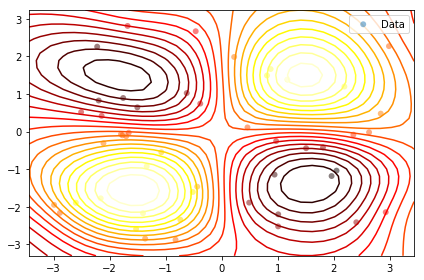

In [129]:
m.plot()

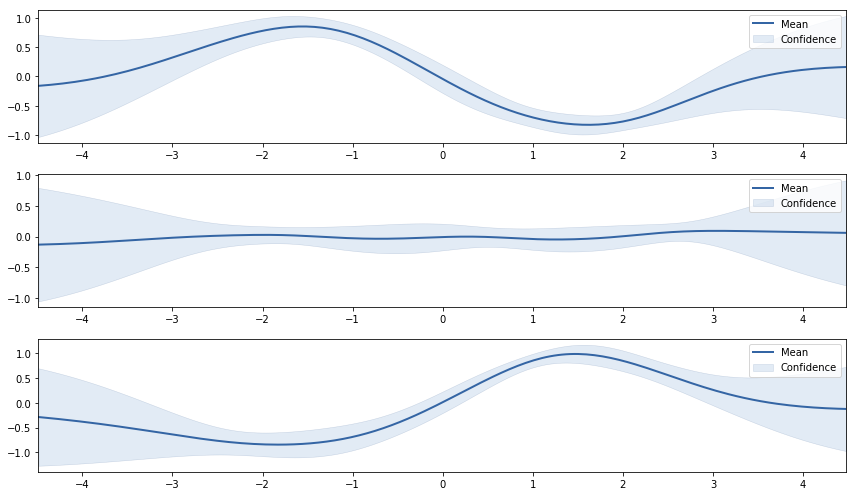

In [136]:
slices = [-1, 0, 1.5]

figure = GPy.plotting.plotting_library().figure(3, 1, figsize=(12,7))

for i, y in enumerate(slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(1, y)], row=(i+1), plot_data=False)
    

{'dataplot': [<matplotlib.collections.PathCollection at 0x7ff6716bee10>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x7ff6716beda0>]}

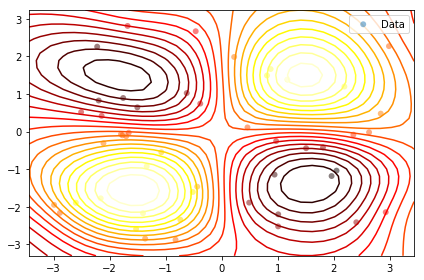

In [139]:
m.plot()

In [142]:
import GPy.models.state_space_model as SS_model

def state_space_example():
    X = np.linspace(0, 10, 2000)[:, None]
    Y = np.sin(X) + np.random.randn(*X.shape)*0.1

    kernel1 = GPy.kern.Matern32(X.shape[1])
    m1  = GPy.models.GPRegression(X,Y, kernel1)

    print(m1)
    m1.optimize(optimizer='bfgs',messages=True)

    print(m1)

    kernel2 = GPy.kern.sde_Matern32(X.shape[1])
    #m2  = SS_model.StateSpace(X,Y, kernel2)
    m2 = GPy.models.StateSpace(X,Y, kernel2)
    print(m2)

    m2.optimize(optimizer='bfgs',messages=True)

    print(m2)

    return m1, m2



In [143]:
state_space_example()


Name : GP regression
Objective : 1891.4725122162135
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  Mat32.variance           |    1.0  |      +ve      |        
  Mat32.lengthscale        |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        



Name : GP regression
Objective : -1745.4111614055128
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  Mat32.variance           |    2.6261431110686067  |      +ve      |        
  Mat32.lengthscale        |    5.4825035870413625  |      +ve      |        
  Gaussian_noise.variance  |  0.009570346568395683  |      +ve      |        

Name : StateSpace
Objective : 1891.4724959184618
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  StateSpace.              |  value  |  constraints  |  priors
  Mat32.variance           |    1.0  |      +ve      |        
  Mat32.lengthscale        |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        



Name : StateSpace
Objective : -1745.4111614055098
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  StateSpace.              |                 value  |  constraints  |  priors
  Mat32.variance           |      2.62614171386702  |      +ve      |        
  Mat32.lengthscale        |     5.482501169778502  |      +ve      |        
  Gaussian_noise.variance  |  0.009570356564084413  |      +ve      |        


(<GPy.models.gp_regression.GPRegression at 0x7ff68fb94f28>,
 <GPy.models.state_space_model.StateSpace at 0x7ff671555e10>)

In [144]:
a, b = _

{'dataplot': [<matplotlib.collections.PathCollection at 0x7ff670ab1940>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7ff670ab18d0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7ff670ab1e10>]}

/home/darth/projects/bopt/.venv/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



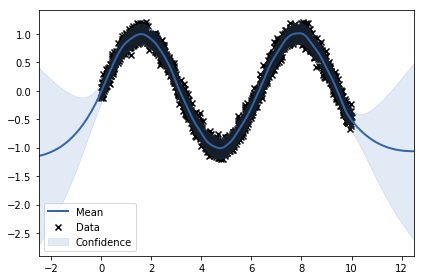

In [147]:
a.plot()

{'dataplot': [<matplotlib.collections.PathCollection at 0x7ff670de4cf8>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7ff66af3a320>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7ff670de4ba8>]}

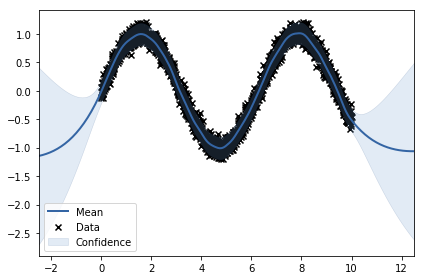

In [148]:
b.plot()

In [149]:
a

GP_regression.,value,constraints,priors
Mat32.variance,2.6261431110686067,+ve,
Mat32.lengthscale,5.4825035870413625,+ve,
Gaussian_noise.variance,0.009570346568395683,+ve,


In [150]:
b

StateSpace.,value,constraints,priors
Mat32.variance,2.62614171386702,+ve,
Mat32.lengthscale,5.482501169778502,+ve,
Gaussian_noise.variance,0.009570356564084413,+ve,


In [153]:
m.predict(np.array([[1., 3.]]))

(array([[0.3651622]]), array([[0.11024284]]))

In [204]:
d = m.to_dict()

In [207]:
GPy.models.GPRegression.from_dict(d)

GP_regression.,value,constraints,priors
rbf.variance,0.6521006488161492,+ve,
rbf.lengthscale,1.3824280143198506,+ve,
Gaussian_noise.variance,0.0012500989024878608,+ve,
